In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
d = dict(data.isnull().sum())
d

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

In [15]:
val = list(d.values())
ke = list(d.keys())

In [16]:
for i in range(len(val)):
    if val[i] != 0:
        print(ke[i])

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [17]:
data.corr(method='spearman')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,-0.013038,...,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,...,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,...,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,...,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,...,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,...,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,...,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,...,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,-0.035507,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,...,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.013038,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,...,0.179359,0.081420,-0.148339,0.046802,0.071989,0.057586,0.005097,-0.016405,0.020793,0.301871


<AxesSubplot:>

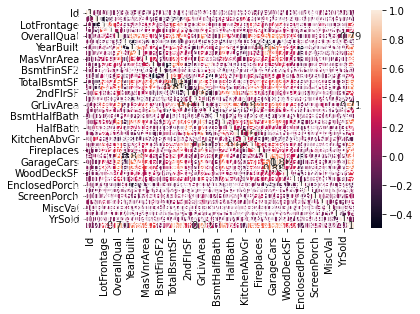

In [18]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr,annot=True)

data.fillna(method ='bfill',inplace=True)

In [19]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [47]:
X = data.iloc[:,:80]
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [48]:
k = dict(X.dtypes)
k

{'Id': dtype('int64'),
 'MSSubClass': dtype('int64'),
 'MSZoning': dtype('O'),
 'LotFrontage': dtype('float64'),
 'LotArea': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'LotShape': dtype('O'),
 'LandContour': dtype('O'),
 'Utilities': dtype('O'),
 'LotConfig': dtype('O'),
 'LandSlope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition1': dtype('O'),
 'Condition2': dtype('O'),
 'BldgType': dtype('O'),
 'HouseStyle': dtype('O'),
 'OverallQual': dtype('int64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('O'),
 'RoofMatl': dtype('O'),
 'Exterior1st': dtype('O'),
 'Exterior2nd': dtype('O'),
 'MasVnrType': dtype('O'),
 'MasVnrArea': dtype('float64'),
 'ExterQual': dtype('O'),
 'ExterCond': dtype('O'),
 'Foundation': dtype('O'),
 'BsmtQual': dtype('O'),
 'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinSF1': dtype('int64'),
 'BsmtFinType2': dtype('O'),
 'BsmtF

In [49]:
val = list(k.values())
ke = list(k.keys())

In [50]:
val

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype(

In [51]:
ob = []
for i in range(len(val)):
    if val[i] == 'O':
        ob.append(ke[i])
        
ob

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [52]:
for i in range(len(ob)):
    X[ob[i]] = LabelEncoder().fit_transform(X[ob[i]])

In [53]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0,3,4,4,0,2,2008,8,4
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0,3,4,4,0,5,2007,8,4
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,0,3,4,4,0,9,2008,8,4
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,0,3,4,4,0,2,2006,8,0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,0,3,4,4,0,8,2007,8,4
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,0,3,2,4,0,2,2010,8,4
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,0,3,0,2,2500,5,2010,8,4
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,0,3,4,4,0,4,2010,8,4


In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
  
X_ = imputer.transform(X)
print(X_)

[[1.000e+00 6.000e+01 3.000e+00 ... 2.008e+03 8.000e+00 4.000e+00]
 [2.000e+00 2.000e+01 3.000e+00 ... 2.007e+03 8.000e+00 4.000e+00]
 [3.000e+00 6.000e+01 3.000e+00 ... 2.008e+03 8.000e+00 4.000e+00]
 ...
 [1.458e+03 7.000e+01 3.000e+00 ... 2.010e+03 8.000e+00 4.000e+00]
 [1.459e+03 2.000e+01 3.000e+00 ... 2.010e+03 8.000e+00 4.000e+00]
 [1.460e+03 2.000e+01 3.000e+00 ... 2.008e+03 8.000e+00 4.000e+00]]


In [56]:
X = pd.DataFrame(X_, columns = X.columns.values)
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,3.0,62.0,7917.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,8.0,2007.0,8.0,4.0
1456,1457.0,20.0,3.0,85.0,13175.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,2.0,4.0,0.0,2.0,2010.0,8.0,4.0
1457,1458.0,70.0,3.0,66.0,9042.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,0.0,2.0,2500.0,5.0,2010.0,8.0,4.0
1458,1459.0,20.0,3.0,68.0,9717.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,4.0,2010.0,8.0,4.0


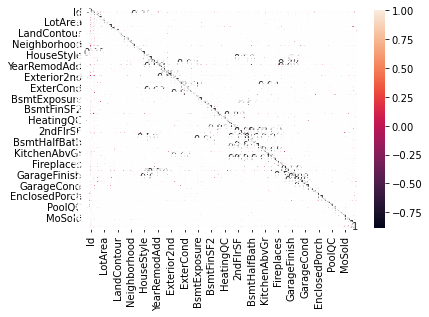

In [57]:
import seaborn as sns
corr = X.corr()
corr_heatmap = sns.heatmap(corr, annot=True)

In [58]:
Y = data.iloc[:,80:]
Y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [60]:
model = LinearRegression()

In [61]:
model.fit(X_train,Y_train)

LinearRegression()

In [62]:
model.score(X_train,Y_train)

0.8431067780586124

In [63]:
pred = model.predict(X_test)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [65]:
r2_score(Y_test,pred)

0.8325668333182279

In [66]:
mean_squared_error(Y_test,pred)

1195523512.6672752

In [67]:
mean_absolute_error(Y_test,pred)

20930.570881922555

C:\Users\Roshan Upadhyay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

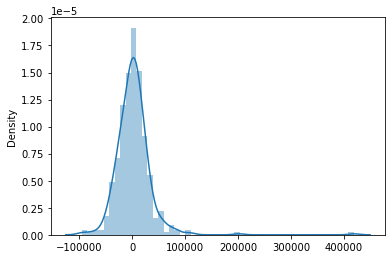

In [68]:
residual = Y_test - pred
sns.distplot(residual)

Text(0, 0.5, 'predicted values')

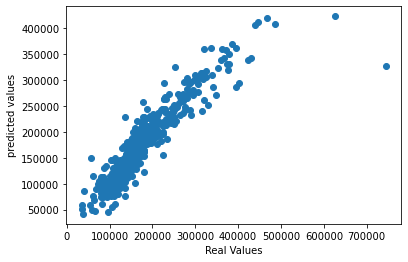

In [69]:
plt.scatter(Y_test,pred)
plt.xlabel("Real Values")
plt.ylabel("predicted values")

# Validataion of Data

In [70]:
X_val = pd.read_csv('test.csv')
X_val

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [71]:
X_val.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [72]:
d1 = dict(X_val.isnull().sum())
d1

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 4,
 'LotFrontage': 227,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1352,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 2,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 16,
 'MasVnrArea': 15,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 44,
 'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinType1': 42,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 42,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 0,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 1,
 'TotRmsAbvGrd': 0,
 'Functional': 2,
 'F

In [73]:
val = list(d1.values())
ke = list(d1.keys())

In [74]:
for i in range(len(val)):
    if val[i] != 0:
        print(ke[i])

MSZoning
LotFrontage
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType


In [75]:
X_val.corr(method='spearman')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.007181,-0.021680,0.011641,-0.066390,0.007193,-0.065991,-0.085577,-0.033307,-0.045308,...,-0.046637,-0.007128,-0.022590,0.022598,-0.021769,0.036491,0.041897,-0.019466,0.147432,-0.976826
MSSubClass,0.007181,1.000000,-0.401100,-0.357573,0.089237,-0.055385,0.030528,0.025359,-0.036613,-0.097937,...,-0.048085,0.012458,0.024020,-0.015627,-0.028584,-0.053397,-0.038036,-0.029813,0.008995,-0.011018
LotFrontage,-0.021680,-0.401100,1.000000,0.664071,0.202666,-0.127790,0.194352,0.150121,0.287026,0.164719,...,0.376151,0.133089,0.178295,-0.092222,-0.059651,0.123519,0.081613,0.049538,0.000974,0.002312
LotArea,0.011641,-0.357573,0.664071,1.000000,0.175550,-0.115129,0.143545,0.128840,0.228450,0.179959,...,0.380065,0.177426,0.176397,-0.022521,-0.017884,0.089615,0.081320,0.087235,0.003765,-0.021565
OverallQual,-0.066390,0.089237,0.202666,0.175550,1.000000,-0.200204,0.681266,0.604329,0.440410,0.217922,...,0.555837,0.317893,0.444520,-0.216538,0.001621,0.011071,0.007616,-0.063115,-0.005847,-0.005579
OverallCond,0.007193,-0.055385,-0.127790,-0.115129,-0.200204,1.000000,-0.426824,-0.109019,-0.186861,-0.028915,...,-0.232794,-0.030798,-0.219009,0.157861,0.061446,0.026878,-0.036980,0.035075,-0.002107,0.024968
YearBuilt,-0.065991,0.030528,0.194352,0.143545,0.681266,-0.426824,1.000000,0.731043,0.397130,0.239496,...,0.539751,0.305941,0.413697,-0.459121,-0.002857,-0.060536,-0.000499,-0.065636,0.012265,-0.003215
YearRemodAdd,-0.085577,0.025359,0.150121,0.128840,0.604329,-0.109019,0.731043,1.000000,0.262557,0.112071,...,0.421098,0.270237,0.395151,-0.301976,0.046161,-0.069843,-0.026943,-0.025345,0.005362,0.036214
MasVnrArea,-0.033307,-0.036613,0.287026,0.228450,0.440410,-0.186861,0.397130,0.262557,1.000000,0.304713,...,0.375322,0.200976,0.235177,-0.198146,0.002314,0.076823,-0.002910,-0.031750,0.005400,-0.019481
BsmtFinSF1,-0.045308,-0.097937,0.164719,0.179959,0.217922,-0.028915,0.239496,0.112071,0.304713,1.000000,...,0.253769,0.235306,0.102454,-0.143412,0.081679,0.113525,0.000749,0.036719,0.001885,0.032097


<AxesSubplot:>

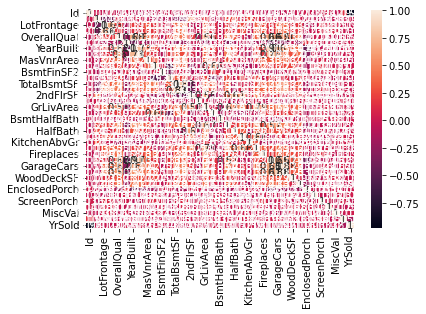

In [76]:
import seaborn as sns
corr = X_val.corr(method='spearman')
sns.heatmap(corr,annot=True)

X_val.fillna(method ='bfill',inplace=True)

In [77]:
X_val.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [78]:
k = dict(X_val.dtypes)
k

{'Id': dtype('int64'),
 'MSSubClass': dtype('int64'),
 'MSZoning': dtype('O'),
 'LotFrontage': dtype('float64'),
 'LotArea': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'LotShape': dtype('O'),
 'LandContour': dtype('O'),
 'Utilities': dtype('O'),
 'LotConfig': dtype('O'),
 'LandSlope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition1': dtype('O'),
 'Condition2': dtype('O'),
 'BldgType': dtype('O'),
 'HouseStyle': dtype('O'),
 'OverallQual': dtype('int64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('O'),
 'RoofMatl': dtype('O'),
 'Exterior1st': dtype('O'),
 'Exterior2nd': dtype('O'),
 'MasVnrType': dtype('O'),
 'MasVnrArea': dtype('float64'),
 'ExterQual': dtype('O'),
 'ExterCond': dtype('O'),
 'Foundation': dtype('O'),
 'BsmtQual': dtype('O'),
 'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinSF1': dtype('float64'),
 'BsmtFinType2': dtype('O'),
 'Bsm

In [79]:
val = list(k.values())
ke = list(k.keys())

In [80]:
val

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('

In [81]:
ob = []
for i in range(len(val)):
    if val[i] == 'O':
        ob.append(ke[i])
        
ob

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [82]:
for i in range(len(ob)):
    X_val[ob[i]] = LabelEncoder().fit_transform(X_val[ob[i]])

In [83]:
X_val

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,2,3,3,0,...,120,0,2,2,3,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,2,0,3,0,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,2,0,3,0,...,0,0,2,2,3,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,2,0,3,0,...,0,0,2,4,3,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,2,0,1,0,...,144,0,2,4,3,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,2,3,3,0,...,0,0,2,4,3,0,6,2006,8,4
1455,2916,160,4,21.0,1894,1,2,3,3,0,...,0,0,2,4,3,0,4,2006,8,0
1456,2917,20,3,160.0,20000,1,2,3,3,0,...,0,0,2,4,3,0,9,2006,8,0
1457,2918,85,3,62.0,10441,1,2,3,3,0,...,0,0,2,2,2,700,7,2006,8,4


In [84]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X_val)
  
X_ = imputer.transform(X_val)
print(X_)

[[1.461e+03 2.000e+01 2.000e+00 ... 2.010e+03 8.000e+00 4.000e+00]
 [1.462e+03 2.000e+01 3.000e+00 ... 2.010e+03 8.000e+00 4.000e+00]
 [1.463e+03 6.000e+01 3.000e+00 ... 2.010e+03 8.000e+00 4.000e+00]
 ...
 [2.917e+03 2.000e+01 3.000e+00 ... 2.006e+03 8.000e+00 0.000e+00]
 [2.918e+03 8.500e+01 3.000e+00 ... 2.006e+03 8.000e+00 4.000e+00]
 [2.919e+03 6.000e+01 3.000e+00 ... 2.006e+03 8.000e+00 4.000e+00]]


In [85]:
X_val = pd.DataFrame(X_, columns = X_val.columns.values)
X_val

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,20.0,2.0,80.0,11622.0,1.0,2.0,3.0,3.0,0.0,...,120.0,0.0,2.0,2.0,3.0,0.0,6.0,2010.0,8.0,4.0
1,1462.0,20.0,3.0,81.0,14267.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,0.0,12500.0,6.0,2010.0,8.0,4.0
2,1463.0,60.0,3.0,74.0,13830.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,2.0,3.0,0.0,3.0,2010.0,8.0,4.0
3,1464.0,60.0,3.0,78.0,9978.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,6.0,2010.0,8.0,4.0
4,1465.0,120.0,3.0,43.0,5005.0,1.0,2.0,0.0,1.0,0.0,...,144.0,0.0,2.0,4.0,3.0,0.0,1.0,2010.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,4.0,21.0,1936.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,6.0,2006.0,8.0,4.0
1455,2916.0,160.0,4.0,21.0,1894.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,4.0,2006.0,8.0,0.0
1456,2917.0,20.0,3.0,160.0,20000.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,2.0,4.0,3.0,0.0,9.0,2006.0,8.0,0.0
1457,2918.0,85.0,3.0,62.0,10441.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,2.0,2.0,2.0,700.0,7.0,2006.0,8.0,4.0


In [86]:
pred_val = model.predict(X_val)
pred_val

array([[ 99380.2478242 ],
       [159458.02958153],
       [153922.04205387],
       ...,
       [129492.84939578],
       [118776.28215948],
       [227504.57238358]])

In [87]:
df = pd.DataFrame(pred_val, columns =['SalePrice'])
df

,SalePrice
0,99380.247824
1,159458.029582
2,153922.042054
3,175336.606121
4,175618.085681
...,...
1454,53988.270314
1455,45549.548708
1456,129492.849396
1457,118776.282159


In [88]:
df.insert(0, "Id", X_val['Id'], True)
df

,Id,SalePrice
0,1461.0,99380.247824
1,1462.0,159458.029582
2,1463.0,153922.042054
3,1464.0,175336.606121
4,1465.0,175618.085681
...,...,...
1454,2915.0,53988.270314
1455,2916.0,45549.548708
1456,2917.0,129492.849396
1457,2918.0,118776.282159


In [89]:
df.to_csv('Sales_Price.csv',index=False)